# Online News Popularity Dataset

## Importing the necessary libraries

In [62]:
# Libraries to work with the datasets
import re
import numpy as np
import pandas as pd

# Libraries to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- Importing the CSV resulting file of normalized data.

In [63]:
path = "C:/Users/Bruno/Documents/GitHub/NCI_DMML1_Project/"
file_name = path + 'Results/OnlineNewsPopularity.csv'
data = pd.read_csv(file_name)

In [64]:
data.head()

,n_tokens_title,num_hrefs,average_token_length,is_weekend,global_sentiment_polarity,title_sentiment_polarity,shares,popularity,workday,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Other,data_channel_Social Media,data_channel_Tech,data_channel_World
0,12.0,4.0,4.680365,0.0,0.092562,-0.187500,593,Very Poor,1,1,0,0,0,0,0
1,13.0,19.0,4.682836,0.0,0.281003,0.136364,505,Very Poor,1,0,0,0,0,1,0
2,8.0,21.0,4.654167,0.0,0.268303,0.000000,556,Very Poor,1,0,1,0,0,0,0
3,9.0,9.0,5.296675,0.0,0.033333,0.000000,598,Very Poor,1,0,0,0,0,0,1
4,11.0,20.0,4.629983,0.0,0.268668,0.000000,445,Very Poor,1,0,0,0,0,1,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12849 entries, 0 to 12848
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    n_tokens_title              12849 non-null  float64
 1    num_hrefs                   12849 non-null  float64
 2    average_token_length        12849 non-null  float64
 3    is_weekend                  12849 non-null  float64
 4    global_sentiment_polarity   12849 non-null  float64
 5    title_sentiment_polarity    12849 non-null  float64
 6    shares                      12849 non-null  int64  
 7    popularity                  12849 non-null  object 
 8    workday                     12849 non-null  int64  
 9    data_channel_Entertainment  12849 non-null  int64  
 10   data_channel_Lifestyle      12849 non-null  int64  
 11   data_channel_Other          12849 non-null  int64  
 12   data_channel_Social Media   12849 non-null  int64  
 13   data_channel_Te

### Creating the variables to work with the models.

- Dependent variable: "".
- Independent variables: ''.

In [66]:
X = data.drop([' shares', ' popularity'], axis=1)
y = data[' popularity']

### Checking the size of predictors (X) and predictable (y) features (Same quantity of rows)

In [67]:
X.shape,y.shape

((12849, 13), (12849,))

### Defining a variable to change the predictors (X) if needed

In [68]:
X.columns

Index([' n_tokens_title', ' num_hrefs', ' average_token_length', ' is_weekend',
       ' global_sentiment_polarity', ' title_sentiment_polarity', ' workday',
       ' data_channel_Entertainment', ' data_channel_Lifestyle',
       ' data_channel_Other', ' data_channel_Social Media',
       ' data_channel_Tech', ' data_channel_World'],
      dtype='object')

In [69]:
resources = [' n_tokens_title', ' num_hrefs', ' average_token_length', ' is_weekend',
       ' global_sentiment_polarity', ' title_sentiment_polarity', ' workday',
       ' data_channel_Entertainment', ' data_channel_Lifestyle',
       ' data_channel_Other', ' data_channel_Social Media',
       ' data_channel_Tech', ' data_channel_World']

In [70]:
X = X[resources]

### Spliting the dataset into training and test datasets. The test dataset will be 30% of the original dataset.

In [71]:
# Library to split the dataset into train and test set
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [73]:
X_train.shape, y_train.shape

((8994, 13), (8994,))

In [74]:
X_test.shape, y_test.shape

((3855, 13), (3855,))

### Defining a default class to fit all the models

- Creating class to use for loop all the models.

In [75]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)
    
    def predict_proba(self,x):
        return self.clf.predict_proba(x)
       

In [76]:
# Libraries to apply the ML models
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
modelos = [{'name': 'logreg',
            'model': LogisticRegression},
           {'name': 'etree',
           'model': ExtraTreesClassifier},
           {'name': 'gradboost',
           'model': GradientBoostingClassifier}, 
           {'name': 'adaboost',
            'model': AdaBoostClassifier},
           {'name': 'SVC',
            'model': SVC},
          {'name': 'KNN',
           'model': KNeighborsClassifier},
           {'name': 'GaussianNB',
           'model': GaussianNB},
           {'name': 'Perceptron',
           'model': Perceptron},
           {'name': 'LinearSVC',
            'model': LinearSVC},
           {'name': 'SGD',
            'model': SGDClassifier},
           {'name': 'Dtree',
           'model': DecisionTreeClassifier},
          {'name': 'RForest',
           'model': RandomForestClassifier}]

### Fitting one dataset for all models to check the best ones

- Loop of all models.

In [78]:
results = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['model'])
    
    name_model = re.findall(r"^\w+",str(x.clf))
    
    # train the o model
    
    x.fit(X_train, y_train)
    
    # generate predictions
    
    x_pred = x.predict(X_test)
    
    # generate score
    
    accuracy = round(x.score(X_test,y_test)*100,2) 
 
    # features importance
        
    if name_model[0] in ['ExtraTreesClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 
                          'DecisionTreeClassifier', 'RandomForestClassifier']:
        
        imp_features = x.feature_importances(X_train, y_train)
    else:
        imp_features = 'N/A'
    
    results.append({'name': model['name'],
                     'model': model['model'],
                       'score': accuracy,
                       'pred': x_pred,
                    'features_importance': imp_features})

C:\Users\Bruno\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Bruno\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Creating dataframe with results

- The dataframe contains the name of the model, the $R^2$ score for each model, predicted values for each model and the importance of features for the models (for models with this feature available).

In [79]:
models = pd.DataFrame(results)

### Comparing the results among the models

Returns the coefficient of determination $R^2$ of the prediction by using the score method of each model.

In [80]:
models[['name','score']].sort_values(by='score', ascending=False)

,name,score
1,etree,44.25
11,RForest,43.79
10,Dtree,40.65
5,KNN,39.74
2,gradboost,36.91
3,adaboost,34.03
4,SVC,33.98
0,logreg,33.96
6,GaussianNB,32.71
8,LinearSVC,32.40


- Defining the **two best scores** from database dataframe into new variables.

In [81]:
best_1 = models.sort_values(by='score', ascending=False).iloc[0]
best_2 = models.sort_values(by='score', ascending=False).iloc[1]

### Feature Importance

- Collecting **features values** from database based on the **two best models**.

In [82]:
best_1_features = best_1['features_importance']
best_2_features = best_2['features_importance']

- Creating a dataframe from feature importance values collected from database **to plot** the results.

In [83]:
cols = X_train.columns.values

feature_dataframe = pd.DataFrame({'Feature': cols, 
                                  # Transforming data into percentage of importance of each feature.
                                  'Feature Importance ({})'.format(best_1['name']): best_1_features*100.00,
                                  'Feature Importance ({})'.format(best_2['name']): best_2_features*100.00}) 

In [84]:
feature_dataframe

,Feature,Feature Importance (etree),Feature Importance (RForest)
0,n_tokens_title,12.814465,12.826740
1,num_hrefs,19.132370,17.217690
2,average_token_length,23.377720,24.103096
3,is_weekend,0.529924,0.734725
4,global_sentiment_polarity,23.450957,24.278641
5,title_sentiment_polarity,15.228768,14.151588
6,workday,0.739773,0.656470
7,data_channel_Entertainment,0.511954,0.929516
8,data_channel_Lifestyle,0.275559,0.568913
9,data_channel_Other,2.056447,2.026070


- Collecting **the 10 best features** to plot for each model (Total features is X variables).

In [85]:
best_1_top10 = feature_dataframe[['Feature','Feature Importance ({})'.format(best_1['name'])]].\
sort_values(by='Feature Importance ({})'.format(best_1['name']), ascending=False).head(10)

best_2_top10 = feature_dataframe[['Feature','Feature Importance ({})'.format(best_2['name'])]].\
sort_values(by='Feature Importance ({})'.format(best_2['name']), ascending=False).head(10)

- Plotting the **feature importance** data of the **two best models**.

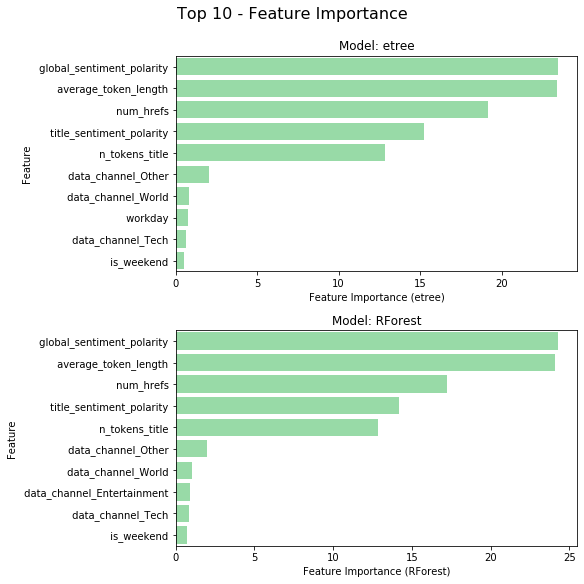

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,constrained_layout=True)
fig.suptitle('Top 10 - Feature Importance', fontsize=16)
fig.set_figheight(8)
fig.set_figwidth(8)

# Best model 1

ax1.set_title('Model: {}'.format(best_1['name']))
sns.set_color_codes("pastel")
sns.barplot(x="Feature Importance ({})".format(best_1['name']), y="Feature", data=best_1_top10, color="g", ax=ax1)


# Best model 2

ax2.set_title('Model: {}'.format(best_2['name']))
sns.set_color_codes("pastel")
sns.barplot(x="Feature Importance ({})".format(best_2['name']), y="Feature", data=best_2_top10, color="g", ax=ax2)

plt.savefig(path + 'Figures/news_feature_importance.png')
plt.show()

### Confusion Matrix

In [87]:
# Library to work with Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

- Collecting predictive values to use with **Confusion Matrix** of the **two best models**.

In [88]:
best_1_pred = best_1['pred']
best_2_pred = best_2['pred']

- Plotting the **confusion matrix** of the **two best models**.

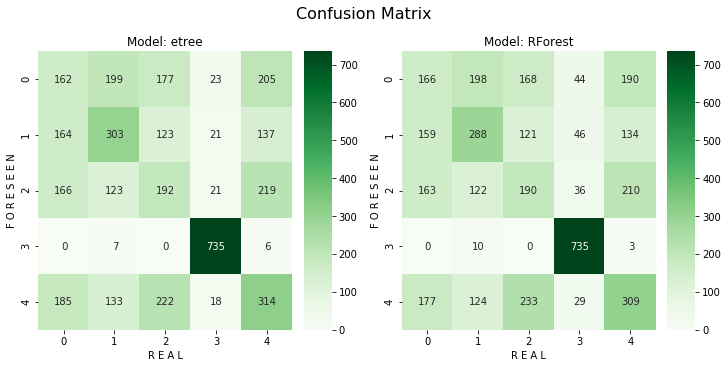

In [89]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,constrained_layout=True)
fig.suptitle('Confusion Matrix', fontsize=16)
fig.set_figheight(5)
fig.set_figwidth(10)

# Best 1 plot

sns.heatmap(confusion_matrix(y_test, best_1_pred), cmap='Greens', annot=True, fmt='2.0f', ax=ax1)
ax1.set_title('Model: {}'.format(best_1['name']))
ax1.set_ylabel('F O R E S E E N')
ax1.set_xlabel('R E A L')

# Best 2 plot

sns.heatmap(confusion_matrix(y_test, best_2_pred), cmap='Greens', annot=True, fmt='2.0f', ax=ax2)
ax2.set_title('Model: {}'.format(best_2['name']))
ax2.set_ylabel('F O R E S E E N')
ax2.set_xlabel('R E A L')

plt.savefig(path + 'Figures/news_confusion_matrix.png')
plt.show()

### Evaluating Confusion Matrix

- Calculating **precision**, **recall**, **accuracy** and **F1 scores** of the **two best models**.

In [90]:
# Precision

p_score_1 = precision_score(y_test,best_1_pred, average='macro')
p_score_2 = precision_score(y_test,best_2_pred, average='macro')

# Recall

r_score_1 = recall_score(y_test,best_1_pred, average='macro')
r_score_2 = recall_score(y_test,best_2_pred, average='macro')

# Accuracy

a_score_1 = accuracy_score(y_test,best_1_pred)
a_score_2 = accuracy_score(y_test,best_2_pred)

# F1 Score

f_score_1 = f1_score(y_test,best_1_pred, average='macro')
f_score_2 = f1_score(y_test,best_2_pred, average='macro')

- Creating dataframe with the **precision**, **recall**, **accuracy** and **F1 scores** of the **two best models**.

In [91]:
score_results = {'model':['{}'.format(best_1['name']), '{}'.format(best_2['name'])],
                     'Precision':[p_score_1, p_score_2],
                     'Recall': [r_score_1, r_score_2],
                     'Accuracy': [a_score_1, a_score_2],
                     'F1 Score': [f_score_1, f_score_2]}

In [92]:
confusion_matrix = pd.DataFrame(score_results)

- Showing **precision**, **recall**, **accuracy** and **F1 scores** results of the **two best models**.

In [93]:
confusion_matrix

,model,Precision,Recall,Accuracy,F1 Score
0,etree,0.431845,0.445115,0.442542,0.437919
1,RForest,0.419142,0.440448,0.437873,0.428183
